# FAIRe Qualitäts-KPIs
Autor: Erwin Durasow 
Datum:  26.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:




Welchen Einfluss haben Datenqualität und das FAIR Dataprinzip auf die Konstruktionsphase eines Legoautos hinsichtlich ihrer Vergleichbarkeit und der daraufhin folgenden Verbesserung der Legoautos?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Das Versuchsziel ist es ein möglichst leichtes und preiswertes Lego Auto zu konstruieren welches mittles Metadaten und erechneten KPIs mit anderen Lego Auto auf seine Perfomance leicht verglichen werden kann. Dabei wird besonders auf die Datenqualtität der Metadaten geachtet für die weitere Nutzung dieser Daten

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Die erste Variante des LightBrickCars](Lego_Auto_1.PNG)


Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Das erste Fahrzeug ist besonders klein, dammit sehr leicht und preiswert. Somit ist die Zugänglichkeit für Kunden maximal gewährleistet. 

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [15]:
# import modules
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [16]:
# initialize components

# loading metadata from Jason files for all components
# initializing axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle = LegoComponent("front axle", axles["60485"])
back_axle = LegoComponent("back axle", axles["3737"])
motor_axle = LegoComponent("motor axle", axles["3707"])

# initializing wheels    
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_left_wheel = LegoComponent("front left wheel", wheels["3482c01"])
front_right_wheel = LegoComponent("front right wheel", wheels["3482c01"])
back_left_wheel = LegoComponent("back left wheel", wheels["56904c02"])
back_right_wheel = LegoComponent("front right wheel", wheels["56904c02"])
  
# initializing frames    
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
    
front_frame = LegoComponent("front frame", frames["32532"])
back_frame = LegoComponent("back frame", frames["32532"])
brick_with_holes = LegoComponent("brick with 3 holes", frames["3701"])

# initializing pinconnectors for the frames 
front_pinconnector = LegoComponent("front Pinconnector", frames["48989"])
middle_left_pin = LegoComponent("middle left pin", frames["3673"])
middle_right_pin = LegoComponent("middle right pin", frames["3673"])
back_left_pin = LegoComponent("back left pin", frames["32556"])                                                            
back_middle_pin = LegoComponent("back middle pin", frames["32556"])
back_right_pin = LegoComponent("back right pin", frames["32556"])
                                                          
# initializing battery  
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

battery = LegoComponent("battery", batteries["8881-1"])

# initializing gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

worm_gear = LegoComponent("worm gear", gears["4716"])   
tooth_gear = LegoComponent("tooth gear", gears["3648"]) 

# initializing motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

main_motor = LegoComponent("main motor", motors["8883-1"])



In [17]:
# set properties

# setting all colors to grey only the front pinconnector is red 
# setting colors for...
# ...axles
front_axle.properties["color"] = "grey"
back_axle.properties["color"] = "grey"
motor_axle.properties["color"] = "grey"

# ...wheels
front_left_wheel.properties["color"] = "grey"
front_right_wheel.properties["color"] = "grey"
back_left_wheel.properties["color"] = "grey"
back_right_wheel.properties["color"] = "grey"

# ...frames
front_frame.properties["color"] = "grey"
back_frame.properties["color"] = "grey"
brick_with_holes.properties["color"] = "grey"
front_pinconnector.properties["color"] = "red"
middle_left_pin.properties["color"] = "grey"
middle_right_pin.properties["color"] = "grey"
back_left_pin.properties["color"] = "grey"
back_middle_pin.properties["color"] = "grey"
back_right_pin.properties["color"] = "grey"

# ...batery
battery.properties["color"] = "grey"

# ...gears
worm_gear.properties["color"] = "grey"
tooth_gear.properties["color"] = "grey"

# ...motor
main_motor.properties["color"] = "grey"


In [18]:
# aggregate components
# creating subassembly for the chassis
chassis_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "chassis subassembly",
    assembly_method= "stick together like lego blocks")
chassis_assembly.add([front_frame, back_frame, brick_with_holes,
                      front_pinconnector, middle_left_pin, middle_right_pin,
                      back_left_pin, back_middle_pin, back_right_pin])

# creating subassembly for the drivetrain
drivetrain_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "drivetrain",
    assembly_method= "stick together like lego blocks")
drivetrain_assembly.add([main_motor, motor_axle, worm_gear,
                      tooth_gear, front_axle, front_left_wheel, front_right_wheel,
                      back_axle, back_left_wheel, back_right_wheel])

car_1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car_1",
    manufacturer="TU Darmstadt",
    comment= "LIGHTning McSpeed"
)
car_1.add([chassis_assembly, drivetrain_assembly, battery])


### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

**Aufwand:**    
* Gesammtmasse des Autos : Entspricht der Summe aller Massen der einzelnen Bauteile in Gramm 
$$
m_{ges} = \sum\nolimits_{n=0}^Nm_n
$$

* Gesammtkosten des Autos : Entspricht der Summe der Anschaffungskosten aller Bauteile     
$$
K_{ges} = \sum\nolimits_{n=0}^NK_n
$$

**Verfügbarkeit:**  
* Lieferzeit:  Entspricht der längsten Lieferzeit aller Bauteile in Tagen   
$$
t_{max} = max(t_i)   
$$

**Akzeptabilität:**  
* Feststellmoment (Locking torque): Entspricht dem Anfahrmoment in Ncm   
                                            M_lock wird direkt aus den Metadaten abgelesen     
                                            
* Leerlaufdrehzahl bezogen auf die Gesammtmasse:
$$
P = v_{idle}/m_{ges}
$$


Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [19]:
# calculate the KPIs for your car

# effort KPI
total_mass_car_1 = calculation_rules.kpi_mass(car_1)
car_1.properties["mass [g]"] = total_mass_car_1
total_cost_car_1 = calculation_rules.kpi_cost(car_1)
car_1.properties["cost [€]"] = total_cost_car_1
# Availability KPI 
delivery_time_car_1 = calculation_rules.kpi_time(car_1)
car_1.properties["total deliverytime [days]"] = delivery_time_car_1
# acceptability KPI
M_lock_car_1 = main_motor.properties["locking torque [Ncm]"]
car_1.properties["locking torque [Ncm]"] = M_lock_car_1
P_car_1 = main_motor.properties["idle speed [rev per min]"]/total_mass_car_1
car_1.properties["idle speed per mass [rev per g*min]"] = P_car_1

In [20]:
# print your KPIs
print("Gesamtmasse: ", total_mass_car_1, "g")
print("Gesamtkosten: ", total_cost_car_1, "Euro")
print("Lieferzeit: ", delivery_time_car_1, "d")
print("Feststellmoment: ", M_lock_car_1, "Ncm")
print("Leerlaufdrehzahl pro Masse: ", P_car_1, "1/gmin")

Gesamtmasse:  271.89 g
Gesamtkosten:  33.829999999999984 Euro
Lieferzeit:  12 d
Feststellmoment:  11 Ncm
Leerlaufdrehzahl pro Masse:  1.4895729890764648 1/gmin


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [21]:
# export car and its properties


with open("car_1.json", "w") as fp:
    json.dump(car_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Das Ziel dieses Versuches ist es das Lego Auto hinscihtlich des KPIs Gesammtkosten zu verbessern. Also diesen Wert zu verringern.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Die erste Variante des LightBrickCars](Lego_Auto_2.PNG)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Das zweite Fahrzeug ist eine verbesserte Form des ersten Fahrzeuges etwas länger, jedoch billiger und leichter. Somit ist die Zugänglichkeit und Akzeptanz für Kunden noch besser gewährleistet. 

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [22]:

# initialize components

# loading metadata from Jason files for all components
# initializing axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle = LegoComponent("front axle", axles["60485"])
back_axle = LegoComponent("back axle", axles["3737"])
motor_axle = LegoComponent("motor axle", axles["3707"])

# initializing wheels    
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_left_wheel = LegoComponent("front left wheel", wheels["3482c01"])
front_right_wheel = LegoComponent("front right wheel", wheels["3482c01"])
back_left_wheel = LegoComponent("back left wheel", wheels["56904c02"])
back_right_wheel = LegoComponent("front right wheel", wheels["56904c02"])
  
# initializing frames    
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
    
front_frame = LegoComponent("front frame", frames["32532"])
middle_frame = LegoComponent("middle frame", frames["32532"])
back_frame = LegoComponent("back frame", frames["32532"])

# initializing pinconnectors for the frames 
front_pinconnector = LegoComponent("front Pinconnector", frames["48989"])
front_left_pin = LegoComponent("front left pin", frames["3673"])
front_right_pin = LegoComponent("front left pin", frames["3673"])
back_left_pin = LegoComponent("back left pin", frames["3673"])
back_right_pin = LegoComponent("back right pin", frames["3673"])

                                                          
# initializing battery  
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

battery = LegoComponent("battery", batteries["2847c01"])

# initializing gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

worm_gear = LegoComponent("worm gear", gears["4716"])   
tooth_gear = LegoComponent("tooth gear", gears["3648"]) 

# initializing motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

main_motor = LegoComponent("main motor", motors["8883-1"])


In [23]:
# set properties

# setting all colors to grey only the front pinconnector is red 
# setting colors for...
# ...axles
front_axle.properties["color"] = "grey"
back_axle.properties["color"] = "grey"
motor_axle.properties["color"] = "grey"

# ...wheels
front_left_wheel.properties["color"] = "grey"
front_right_wheel.properties["color"] = "grey"
back_left_wheel.properties["color"] = "grey"
back_right_wheel.properties["color"] = "grey"

# ...frames
front_frame.properties["color"] = "grey"
middle_frame.properties["color"] = "grey"
back_frame.properties["color"] = "grey"
front_pinconnector.properties["color"] = "red"
front_left_pin.properties["color"] = "grey"
front_right_pin.properties["color"] = "grey"
back_left_pin.properties["color"] = "grey"
back_right_pin.properties["color"] = "grey"

# ...batery
battery.properties["color"] = "grey"

# ...gears
worm_gear.properties["color"] = "grey"
tooth_gear.properties["color"] = "grey"

# ...motor
main_motor.properties["color"] = "grey"

In [24]:
# aggregate components
# creating subassembly for the chassis
chassis_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "chassis subassembly",
    assembly_method= "stick together like lego blocks")
chassis_assembly.add([front_frame, middle_frame, back_frame,
                      front_pinconnector, front_left_pin, front_right_pin,
                      back_left_pin, back_right_pin])

# creating subassembly for the drivetrain
drivetrain_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "drivetrain subassembly",
    assembly_method= "stick together like lego blocks")
drivetrain_assembly.add([main_motor, motor_axle, worm_gear,
                      tooth_gear, front_axle, front_left_wheel, front_right_wheel,
                      back_axle, back_left_wheel, back_right_wheel])

car_2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car_2",
    manufacturer="TU Darmstadt",
    comment= "LIGHTning McSpeed ... now even lighter and cheaper"
)
car_2.add([chassis_assembly, drivetrain_assembly, battery])


### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [25]:
# calculate the KPIs for your car

# effort KPI
total_mass_car_2 = calculation_rules.kpi_mass(car_2)
car_2.properties["mass [g]"] = total_mass_car_2
total_cost_car_2 = calculation_rules.kpi_cost(car_2)
car_2.properties["cost [€]"] = total_cost_car_2
# Availability KPI 
delivery_time_car_2 = calculation_rules.kpi_time(car_2)
car_2.properties["total deliverytime [days]"] = delivery_time_car_2
# acceptability KPI
M_lock_car_2 = main_motor.properties["locking torque [Ncm]"]
car_2.properties["locking torque [Ncm]"] = M_lock_car_1
P_car_2 = main_motor.properties["idle speed [rev per min]"]/total_mass_car_2
car_2.properties["idle speed per mass [rev per g*min]"] = P_car_2

In [26]:
# print your KPIs
print("Daten des zweiten Autos:")
print("Gesamtmasse: ", total_mass_car_2, "g")
print("Gesamtkosten: ", total_cost_car_2, "Euro")
print("Lieferzeit: ", delivery_time_car_2, "d")
print("Feststellmoment: ", M_lock_car_2, "Ncm")
print("Leerlaufdrehzahl pro Masse: ", P_car_2, "1/gmin")

Daten des zweiten Autos:
Gesamtmasse:  271.29999999999995 g
Gesamtkosten:  23.720000000000006 Euro
Lieferzeit:  12 d
Feststellmoment:  11 Ncm
Leerlaufdrehzahl pro Masse:  1.4928123848138595 1/gmin


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [27]:
# export car and its properties

with open("car_2.json", "w") as fp:
    json.dump(car_2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

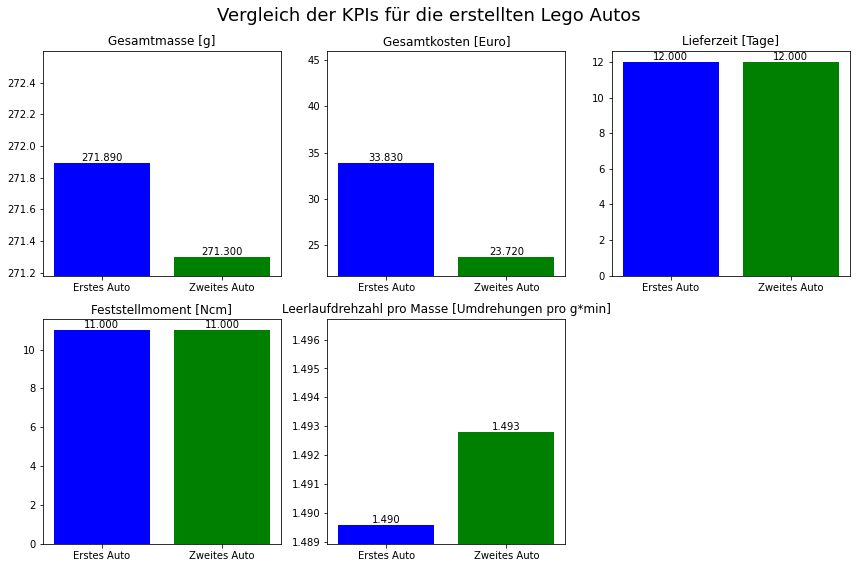

In [28]:
# plot the data, save diagramm as svg-file
import matplotlib.pyplot as plt

# Daten für das erste und zweite Auto
labels = ['Gesamtmasse [g]', 'Gesamtkosten [Euro]', 'Lieferzeit [Tage]', 'Feststellmoment [Ncm]', 'Leerlaufdrehzahl pro Masse [Umdrehungen pro g*min]']
first_data = [total_mass_car_1, total_cost_car_1, delivery_time_car_1, M_lock_car_1, P_car_1]
second_data = [total_mass_car_2, total_cost_car_2, delivery_time_car_2, M_lock_car_2, P_car_2]

# Anzahl der Subplots (in diesem Fall 5, da es 5 Kennwerte gibt)
num_plots = len(labels)

# Erstellen von Subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Vergleich der KPIs für die erstellten Lego Autos', fontsize = 18)

# Farben für die Balken
colors = ['b', 'g']  # Blau und Grün

# Für jeden Kennwert ein Subplot erstellen
for i in range(num_plots):
    row = i // 3  # Zeilenindex
    col = i % 3   # Spaltenindex

    # Daten für den aktuellen Kennwert
    data_first = first_data[i]
    data_second = second_data[i]

    # Positionen für die Balken
    x = [0, 1]  # Hier setzen wir die x-Positionen für die Balken auf 0 und 1

    # Intelligente Y-Limits festlegen
    max_value = max(data_first, data_second)
    delta_value = abs(data_first - data_second)
    axes[row, col].bar(x, [data_first, data_second],tick_label=['Erstes Auto', 'Zweites Auto'], color=colors)
    axes[row, col].set_title(labels[i])
    if delta_value != 0:
        axes[row, col].set_ylim(max_value-1.2*delta_value, max_value+1.2*delta_value)

    # Kennwerte über den Balken hinzufügen
    for j, value in enumerate([data_first, data_second]):
        axes[row, col].text(j, value, f'{value:.3f}', ha='center', va='bottom')

# Entfernen des 6 leeren Axes
axes[1,2].remove()

# Anzeigen der Subplots
plt.tight_layout()

# Speichern des Diagramms als SVG-Datei
plt.savefig('car_comparison.svg')

plt.show()

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Gut erkennbar in den Plots ist die Verbesserung der Gesammtkosten um 10,11 Euro also um grob 30% sowie eine geringe Verbesserung der Gesammtmasse um 0.59 gramm, deswegen konnte sich die Leerlaufdrehzahl minimal verbessert um 0.003 1/g*min werden.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die Auffindbarkeit der KPIs ist gewährleistet da diese in den Jason Datein eindeutig mit Hilfe IDs zugeordnet sind. Außerdem ist die Zugänglichkeit durch die Nutzung von kostenlosen Dateiformaten wie Jason gegeben und selbst ohne die Daten zugänglich da diese seperat abgespeichert werden. 

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Es hat sich gezeigt, dass eine hohe Datenqualtität aufrecht zu halten sehr zeitintensiv ist. Jedoch hat eben diese Datenqualtität die weiteren Berechnungen erleichtert und für dritte verständlicher gemacht. Außerdem hat sich gezeigt, dass die Variantenentwicklung durch Vergleich mit den leicht zugänglichen KPIs deutlich schneller gemacht hat. Zusammengefasst kann man sagen, dass diese Vorgehensweise sinnvoll ist.  